# Friendships Within a Distributed Group Over Time

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Loading Data

### 2017

In [2]:
# Importing Data
data_2017_know = pd.read_csv("data/2017_know.csv", index_col=0)
data_2017_like = pd.read_csv("data/2017_like.csv", index_col=0)
data_2017_contact = pd.read_csv("data/2017_contact.csv", index_col=0)
data_2017_trust = pd.read_csv("data/2017_trust.csv", index_col=0)
data_2017_support = pd.read_csv("data/2017_support.csv", index_col=0)

# General Data / Demographics
data_2017_demographics = pd.read_csv("data/2017_demographics.csv", index_col=0)
people = list(data_2017_demographics.sort_values(by=['lname']).index)
data_2017_demographics_men = data_2017_demographics[data_2017_demographics['gender']=='Male']
data_2017_demographics_women = data_2017_demographics[data_2017_demographics['gender']=='Female']

men = list(data_2017_demographics_men.index)
women = list(data_2017_demographics_women.index)

# Average: The Numbers
avg_2017_know = data_2017_know.mean(axis=1)
avg_2017_like = data_2017_like.mean(axis=1)
avg_2017_contact = data_2017_contact.mean(axis=1)
avg_2017_trust = data_2017_trust.mean(axis=1)
avg_2017_support = data_2017_support.mean(axis=1)
        
# Average: Correlation
avg_2017_all = pd.concat([avg_2017_know, avg_2017_contact, avg_2017_like, avg_2017_trust, avg_2017_support], axis=1, join='inner')
avg_2017_all.columns = ['know', 'contact', 'like', 'trust', 'support']
corr = avg_2017_all.corr()

# Correlation Among Raw Data
data_2017_know_corr = data_2017_know.corr()
data_2017_like_corr = data_2017_like.corr()
data_2017_contact_corr = data_2017_contact.corr()
data_2017_trust_corr = data_2017_trust.corr()
data_2017_support_corr = data_2017_support.corr()

### 2019

In [3]:
# Importing Data
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)

# General Data / Demographics
data_2019_demographics = pd.read_csv("data/2019_demographics.csv", index_col=0)
people = list(data_2019_demographics.sort_values(by=['lname']).index)
data_2019_demographics_men = data_2019_demographics[data_2019_demographics['gender']=='Male']
data_2019_demographics_women = data_2019_demographics[data_2019_demographics['gender']=='Female']

# Average: The Numbers
avg_2019_know = data_2019_know.mean(axis=1)
avg_2019_like = data_2019_like.mean(axis=1)
avg_2019_contact = data_2019_contact.mean(axis=1)
avg_2019_trust = data_2019_trust.mean(axis=1)
avg_2019_support = data_2019_support.mean(axis=1)

avg_2017_know_men_values = []
avg_2017_know_women_values = []
avg_2019_know_descending = []
avg_2019_know_men_values = []
avg_2019_know_women_values = []
for person in avg_2019_know.sort_values(ascending=False).index:
    if avg_2019_know[person] > -100:
        avg_2019_know_descending += [person]
        if person in men:
            avg_2017_know_men_values += [avg_2017_know[person]]
            avg_2017_know_women_values += [0.0]
            avg_2019_know_men_values += [avg_2019_know[person]]
            avg_2019_know_women_values += [0.0]
        elif person in women:
            avg_2017_know_women_values += [avg_2017_know[person]]
            avg_2017_know_men_values += [0.0]
            avg_2019_know_women_values += [avg_2019_know[person]]
            avg_2019_know_men_values += [0.0]

avg_2017_like_men_values = []
avg_2017_like_women_values = []
avg_2019_like_descending = []
avg_2019_like_men_values = []
avg_2019_like_women_values = []
for person in avg_2019_like.sort_values(ascending=False).index:
    if avg_2019_like[person] > -100:
        avg_2019_like_descending += [person]
        if person in men:
            avg_2017_like_men_values += [avg_2017_like[person]]
            avg_2017_like_women_values += [0.0]
            avg_2019_like_men_values += [avg_2019_like[person]]
            avg_2019_like_women_values += [0.0]
        elif person in women:
            avg_2017_like_women_values += [avg_2017_like[person]]
            avg_2017_like_men_values += [0.0]
            avg_2019_like_women_values += [avg_2019_like[person]]
            avg_2019_like_men_values += [0.0]
        
avg_2017_contact_men_values = []
avg_2017_contact_women_values = []
avg_2019_contact_descending = []
avg_2019_contact_men_values = []
avg_2019_contact_women_values = []
for person in avg_2019_contact.sort_values(ascending=False).index:
    if avg_2019_contact[person] > -100:
        avg_2019_contact_descending += [person]
        if person in men:
            avg_2017_contact_men_values += [avg_2017_contact[person]]
            avg_2017_contact_women_values += [0.0]
            avg_2019_contact_men_values += [avg_2019_contact[person]]
            avg_2019_contact_women_values += [0.0]
        elif person in women:
            avg_2017_contact_women_values += [avg_2017_contact[person]]
            avg_2017_contact_men_values += [0.0]
            avg_2019_contact_women_values += [avg_2019_contact[person]]
            avg_2019_contact_men_values += [0.0]

avg_2017_trust_men_values = []
avg_2017_trust_women_values = []
avg_2019_trust_descending = []
avg_2019_trust_men_values = []
avg_2019_trust_women_values = []
for person in avg_2019_trust.sort_values(ascending=False).index:
    if avg_2019_trust[person] > -100:
        avg_2019_trust_descending += [person]
        if person in men:
            avg_2017_trust_men_values += [avg_2017_trust[person]]
            avg_2017_trust_women_values += [0.0]
            avg_2019_trust_men_values += [avg_2019_trust[person]]
            avg_2019_trust_women_values += [0.0]
        elif person in women:
            avg_2017_trust_women_values += [avg_2017_trust[person]]
            avg_2017_trust_men_values += [0.0]
            avg_2019_trust_women_values += [avg_2019_trust[person]]
            avg_2019_trust_men_values += [0.0]
        
avg_2017_support_men_values = []
avg_2017_support_women_values = []
avg_2019_support_descending = []
avg_2019_support_men_values = []
avg_2019_support_women_values = []
for person in avg_2019_support.sort_values(ascending=False).index:
    if avg_2019_support[person] > -100:
        avg_2019_support_descending += [person]
        if person in men:
            avg_2017_support_men_values += [avg_2017_support[person]]
            avg_2017_support_women_values += [0.0]
            avg_2019_support_men_values += [avg_2019_support[person]]
            avg_2019_support_women_values += [0.0]
        elif person in women:
            avg_2017_support_women_values += [avg_2017_support[person]]
            avg_2017_support_men_values += [0.0]
            avg_2019_support_women_values += [avg_2019_support[person]]
            avg_2019_support_men_values += [0.0]

# Average: Correlation
avg_2019_all = pd.concat([avg_2019_know, avg_2019_contact, avg_2019_like, avg_2019_trust, avg_2019_support], axis=1, join='inner')
avg_2019_all.columns = ['know', 'contact', 'like', 'trust', 'support']
corr = avg_2019_all.corr()

# Correlation Among Raw Data
data_2019_know_corr = data_2019_know.corr()
data_2019_like_corr = data_2019_like.corr()
data_2019_contact_corr = data_2019_contact.corr()
data_2019_trust_corr = data_2019_trust.corr()
data_2019_support_corr = data_2019_support.corr()

## Comparing Average Data

### How well do you know other people?

In [4]:
avg_2019_know_descending
# avg_2019_know_men_values

['Cam',
 'Drew',
 'Ruben',
 'Liam',
 'Andrew',
 'Gabby',
 'Alex',
 'Isaac',
 'Michelle',
 'Steph',
 'Emma']

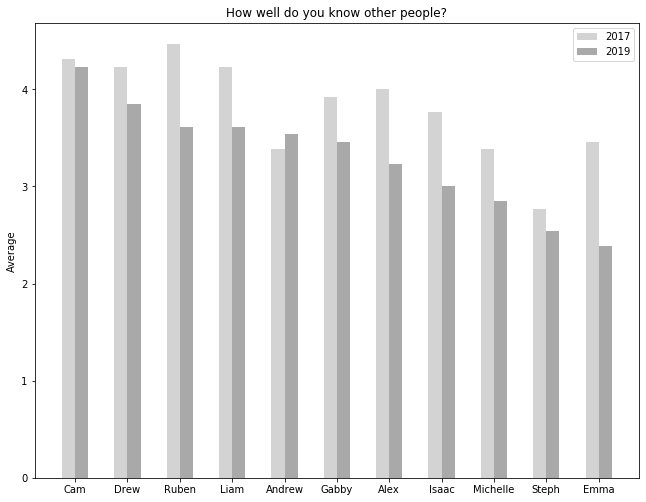

In [5]:
N = len(avg_2019_know_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_know_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_know_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_know_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_know_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How well do you know other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_know_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

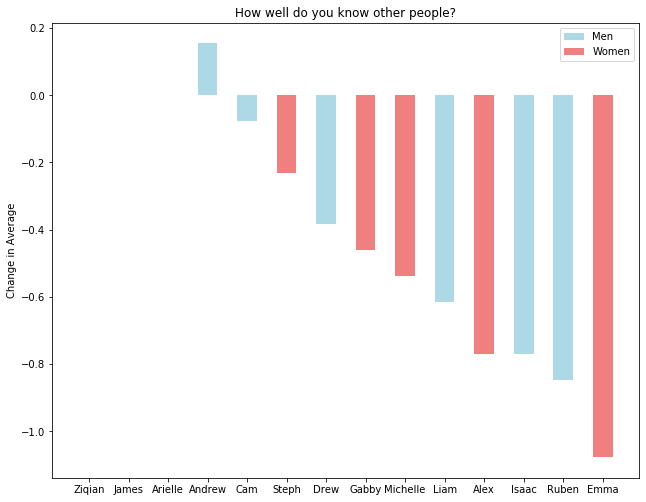

In [6]:
avg_diff_know_dict = {}
avg_diff_know_men_values = []
avg_diff_know_women_values = []
avg_diff_know_descending = []

for person in people:
    avg_diff_know_dict[person] = avg_2019_know[person]-avg_2017_know[person]

for person in {k: v for k, v in sorted(avg_diff_know_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_know_descending += [person]
    if person in men:
        avg_diff_know_men_values += [avg_diff_know_dict[person]]
        avg_diff_know_women_values += [0.0]
    elif person in women:
        avg_diff_know_women_values += [avg_diff_know_dict[person]]
        avg_diff_know_men_values += [0.0]  

N = len(avg_diff_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_know_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How well do you know other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like other people?

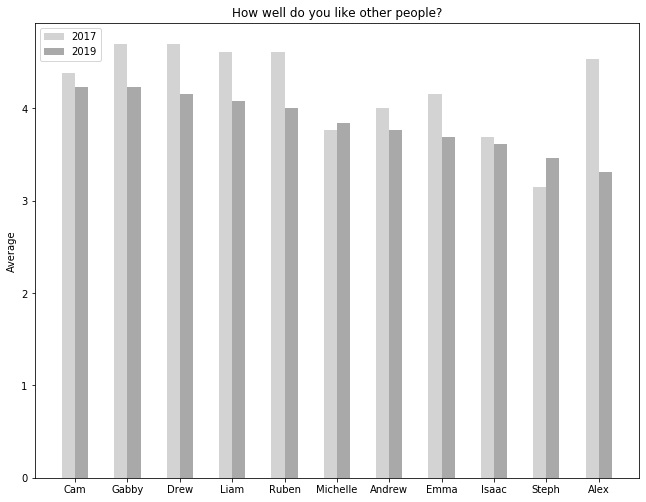

In [7]:
N = len(avg_2019_like_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_like_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_like_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_like_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_like_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How well do you like other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_like_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

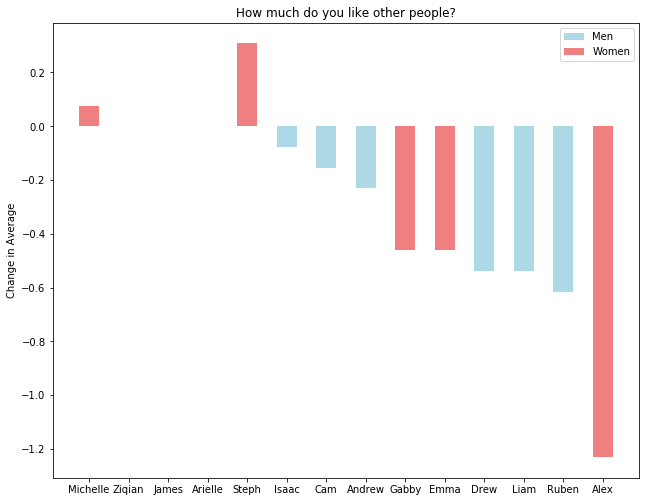

In [8]:
avg_diff_like_dict = {}
avg_diff_like_men_values = []
avg_diff_like_women_values = []
avg_diff_like_descending = []

for person in people:
    avg_diff_like_dict[person] = avg_2019_like[person]-avg_2017_like[person]

for person in {k: v for k, v in sorted(avg_diff_like_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_like_descending += [person]
    if person in men:
        avg_diff_like_men_values += [avg_diff_like_dict[person]]
        avg_diff_like_women_values += [0.0]
    elif person in women:
        avg_diff_like_women_values += [avg_diff_like_dict[person]]
        avg_diff_like_men_values += [0.0]  

N = len(avg_diff_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_like_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How much do you like other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with other people?

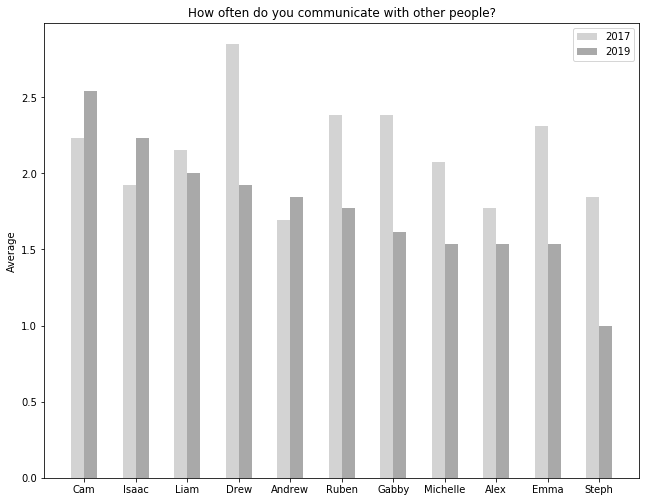

In [9]:
N = len(avg_2019_contact_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_contact_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_contact_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_contact_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_contact_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How often do you communicate with other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_contact_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

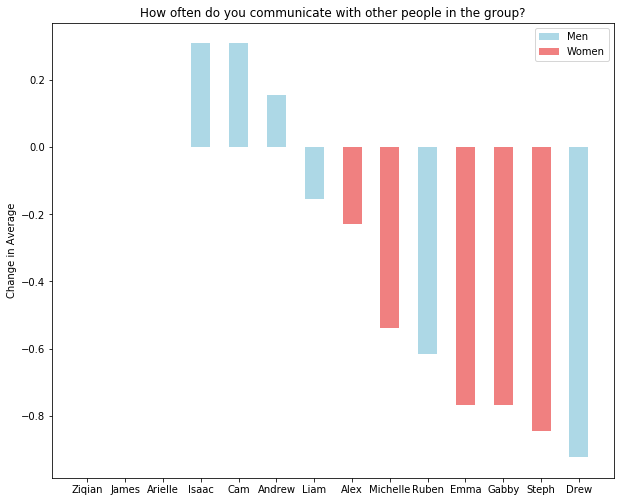

In [42]:
avg_diff_contact_dict = {}
avg_diff_contact_men_values = []
avg_diff_contact_women_values = []
avg_diff_contact_descending = []

for person in people:
    avg_diff_contact_dict[person] = avg_2019_contact[person]-avg_2017_contact[person]

for person in {k: v for k, v in sorted(avg_diff_contact_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_contact_descending += [person]
    if person in men:
        avg_diff_contact_men_values += [avg_diff_contact_dict[person]]
        avg_diff_contact_women_values += [0.0]
    elif person in women:
        avg_diff_contact_women_values += [avg_diff_contact_dict[person]]
        avg_diff_contact_men_values += [0.0]  

N = len(avg_diff_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_contact_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How often do you communicate with other people in the group?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust other people?

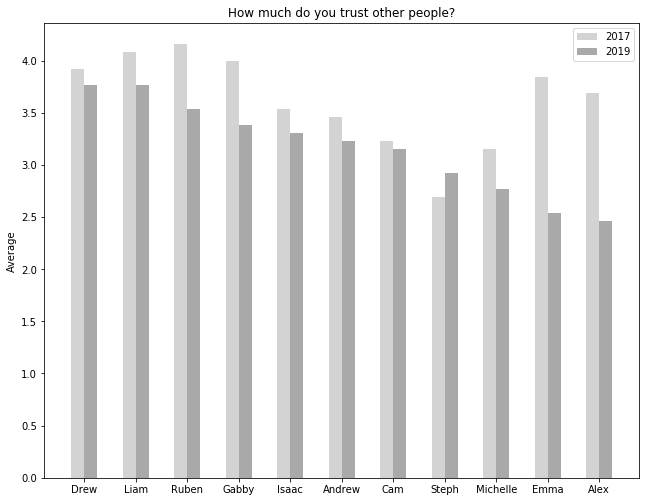

In [11]:
N = len(avg_2019_trust_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_trust_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_trust_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_trust_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_trust_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How much do you trust other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_trust_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

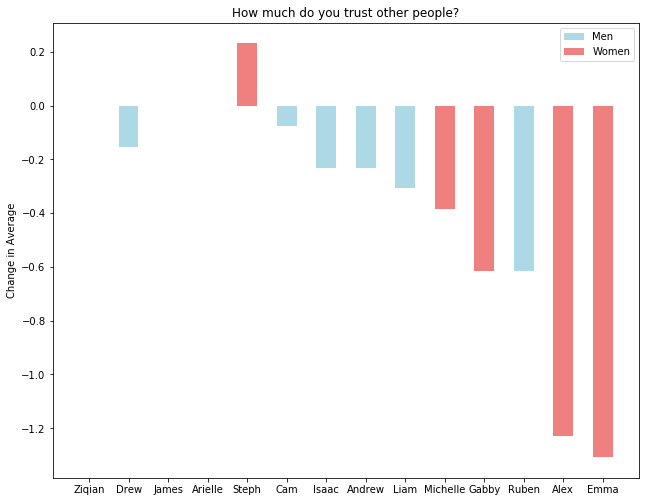

In [12]:
avg_diff_trust_dict = {}
avg_diff_trust_men_values = []
avg_diff_trust_women_values = []
avg_diff_trust_descending = []

for person in people:
    avg_diff_trust_dict[person] = avg_2019_trust[person]-avg_2017_trust[person]

for person in {k: v for k, v in sorted(avg_diff_trust_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_trust_descending += [person]
    if person in men:
        avg_diff_trust_men_values += [avg_diff_trust_dict[person]]
        avg_diff_trust_women_values += [0.0]
    elif person in women:
        avg_diff_trust_women_values += [avg_diff_trust_dict[person]]
        avg_diff_trust_men_values += [0.0]  

N = len(avg_diff_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_trust_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How much do you trust other people?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to other people for advice or emotional support?

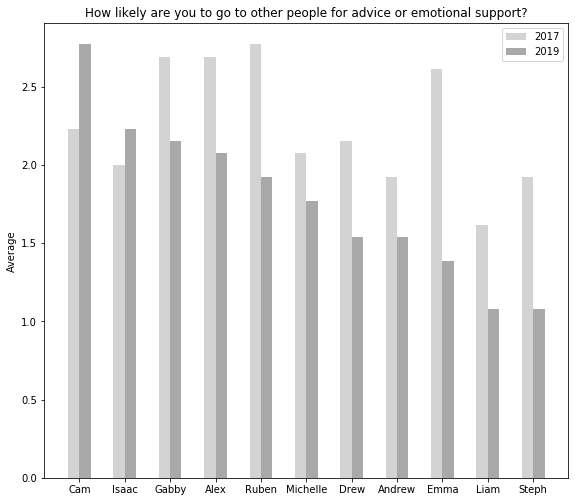

In [13]:
N = len(avg_2019_support_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_support_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_support_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_support_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_support_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How likely are you to go to other people for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_support_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

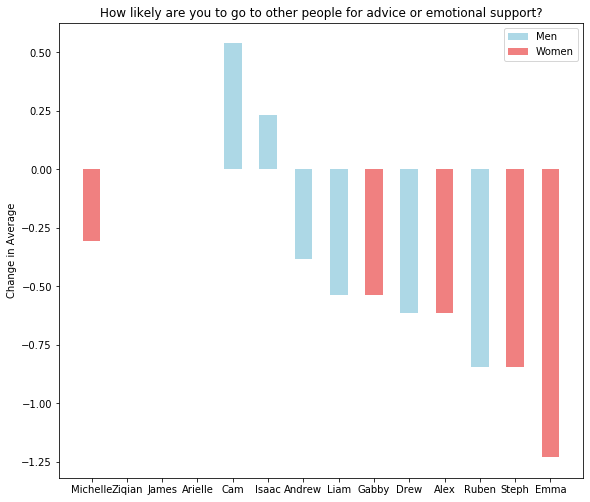

In [14]:
avg_diff_support_dict = {}
avg_diff_support_men_values = []
avg_diff_support_women_values = []
avg_diff_support_descending = []

for person in people:
    avg_diff_support_dict[person] = avg_2019_support[person]-avg_2017_support[person]

for person in {k: v for k, v in sorted(avg_diff_support_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_support_descending += [person]
    if person in men:
        avg_diff_support_men_values += [avg_diff_support_dict[person]]
        avg_diff_support_women_values += [0.0]
    elif person in women:
        avg_diff_support_women_values += [avg_diff_support_dict[person]]
        avg_diff_support_men_values += [0.0]  

N = len(avg_diff_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_support_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How likely are you to go to other people for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## Comparing Average Correlation

In [15]:
avg_2017_all

,know,contact,like,trust,support
Steph,2.769231,1.846154,3.153846,2.692308,1.923077
Emma,3.461538,2.307692,4.153846,3.846154,2.615385
Gabby,3.923077,2.384615,4.692308,4.000000,2.692308
Cam,4.307692,2.230769,4.384615,3.230769,2.230769
Andrew,3.384615,1.692308,4.000000,3.461538,1.923077
Isaac,3.769231,1.923077,3.692308,3.538462,2.000000
Alex,4.000000,1.769231,4.538462,3.692308,2.692308
Arielle,3.538462,1.538462,4.615385,4.076923,1.461538
Liam,4.230769,2.153846,4.615385,4.076923,1.615385
James,4.230769,2.153846,4.076923,3.153846,2.692308


In [16]:
avg_2019_all

,know,contact,like,trust,support
Steph,2.538462,1.000000,3.461538,2.923077,1.076923
Emma,2.384615,1.538462,3.692308,2.538462,1.384615
Gabby,3.461538,1.615385,4.230769,3.384615,2.153846
Cam,4.230769,2.538462,4.230769,3.153846,2.769231
Andrew,3.538462,1.846154,3.769231,3.230769,1.538462
Isaac,3.000000,2.230769,3.615385,3.307692,2.230769
Alex,3.230769,1.538462,3.307692,2.461538,2.076923
Arielle,NaN,NaN,NaN,NaN,NaN
Liam,3.615385,2.000000,4.076923,3.769231,1.076923
James,NaN,NaN,NaN,NaN,NaN


In [17]:
avg_diff_all = avg_2019_all.sub(avg_2017_all)
avg_diff_all

,know,contact,like,trust,support
Steph,-0.230769,-0.846154,0.307692,0.230769,-0.846154
Emma,-1.076923,-0.769231,-0.461538,-1.307692,-1.230769
Gabby,-0.461538,-0.769231,-0.461538,-0.615385,-0.538462
Cam,-0.076923,0.307692,-0.153846,-0.076923,0.538462
Andrew,0.153846,0.153846,-0.230769,-0.230769,-0.384615
Isaac,-0.769231,0.307692,-0.076923,-0.230769,0.230769
Alex,-0.769231,-0.230769,-1.230769,-1.230769,-0.615385
Arielle,NaN,NaN,NaN,NaN,NaN
Liam,-0.615385,-0.153846,-0.538462,-0.307692,-0.538462
James,NaN,NaN,NaN,NaN,NaN


In [18]:
corr = avg_diff_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.294360,0.429306,0.704634,0.437566
contact,0.294360,1.000000,0.046966,0.176141,0.784822
like,0.429306,0.046966,1.000000,0.724625,0.286274
trust,0.704634,0.176141,0.724625,1.000000,0.467784
support,0.437566,0.784822,0.286274,0.467784,1.000000


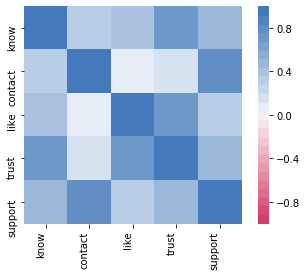

In [19]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [20]:
avg_2019_all.columns = ['2019_know', '2019_contact', '2019_like', '2019_trust', '2019_support']
avg_2017_all.columns = ['2017_know', '2017_contact', '2017_like', '2017_trust', '2017_support']
avg_all_all = pd.concat([avg_2019_all, avg_2017_all], axis=1, join='inner')
avg_all_all

,2019_know,2019_contact,2019_like,2019_trust,2019_support,2017_know,2017_contact,2017_like,2017_trust,2017_support
Steph,2.538462,1.000000,3.461538,2.923077,1.076923,2.769231,1.846154,3.153846,2.692308,1.923077
Emma,2.384615,1.538462,3.692308,2.538462,1.384615,3.461538,2.307692,4.153846,3.846154,2.615385
Gabby,3.461538,1.615385,4.230769,3.384615,2.153846,3.923077,2.384615,4.692308,4.000000,2.692308
Cam,4.230769,2.538462,4.230769,3.153846,2.769231,4.307692,2.230769,4.384615,3.230769,2.230769
Andrew,3.538462,1.846154,3.769231,3.230769,1.538462,3.384615,1.692308,4.000000,3.461538,1.923077
Isaac,3.000000,2.230769,3.615385,3.307692,2.230769,3.769231,1.923077,3.692308,3.538462,2.000000
Alex,3.230769,1.538462,3.307692,2.461538,2.076923,4.000000,1.769231,4.538462,3.692308,2.692308
Arielle,NaN,NaN,NaN,NaN,NaN,3.538462,1.538462,4.615385,4.076923,1.461538
Liam,3.615385,2.000000,4.076923,3.769231,1.076923,4.230769,2.153846,4.615385,4.076923,1.615385
James,NaN,NaN,NaN,NaN,NaN,4.230769,2.153846,4.076923,3.153846,2.692308


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


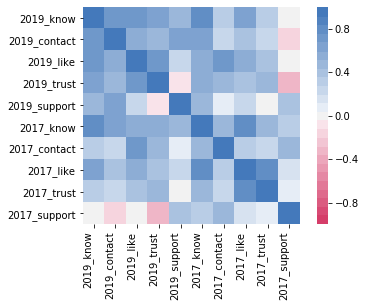

In [21]:
corr_all = avg_all_all.corr()
corr_all

ax = sns.heatmap(
    corr_all, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know other people?

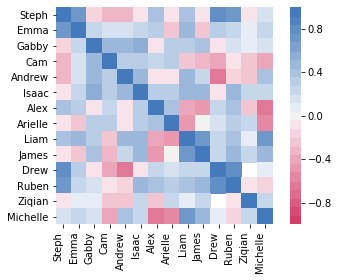

In [22]:
data_diff_know = data_2019_know.sub(data_2017_know)

data_diff_know_corr = data_diff_know.corr()

ax = sns.heatmap(
    data_diff_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like other people?

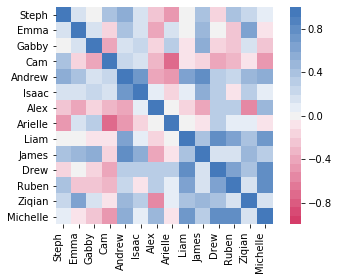

In [23]:
data_diff_like = data_2019_like.sub(data_2017_like)

data_diff_like_corr = data_diff_like.corr()

ax = sns.heatmap(
    data_diff_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with other people (via text, Snapchat, Facebook, in person, etc.)?

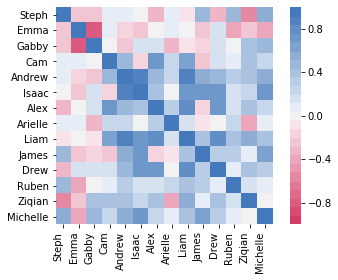

In [24]:
data_diff_contact = data_2019_contact.sub(data_2017_contact)

data_diff_contact_corr = data_diff_contact.corr()

ax = sns.heatmap(
    data_diff_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust other people?

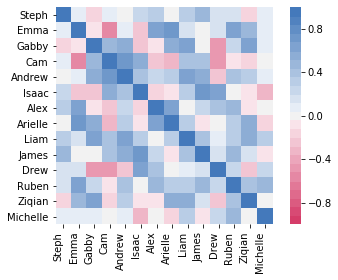

In [25]:
data_diff_trust = data_2019_trust.sub(data_2017_trust)

data_diff_trust_corr = data_diff_trust.corr()

ax = sns.heatmap(
    data_diff_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to other people for advice or emotional support?

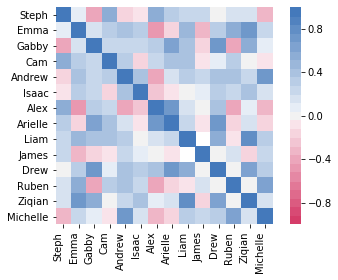

In [26]:
data_diff_support = data_2019_support.sub(data_2017_support)

data_diff_support_corr = data_diff_support.corr()

ax = sns.heatmap(
    data_diff_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## HeatMaps

### Raw Data

#### How well do you know other people?

##### 2017

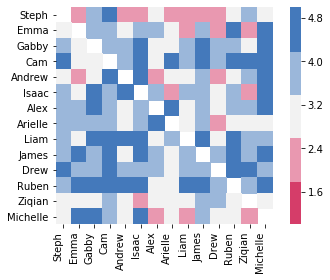

In [27]:
ax = sns.heatmap(
    data_2017_know, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

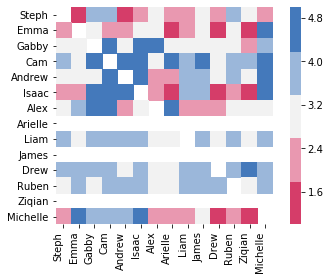

In [28]:
ax = sns.heatmap(
    data_2019_know, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

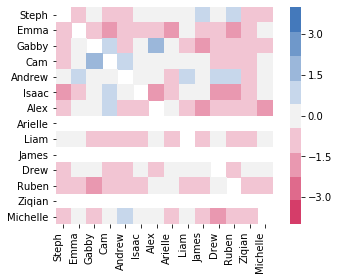

In [29]:
ax = sns.heatmap(
    data_diff_know, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How much do you like other people?

##### 2017

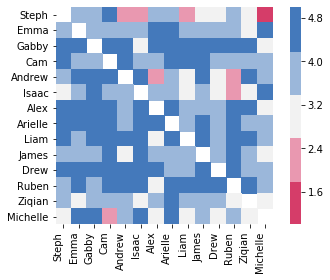

In [30]:
ax = sns.heatmap(
    data_2017_like, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

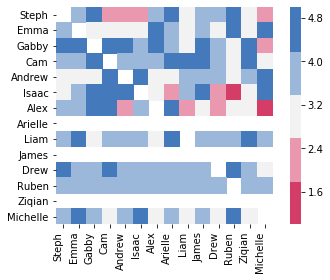

In [31]:
ax = sns.heatmap(
    data_2019_like, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

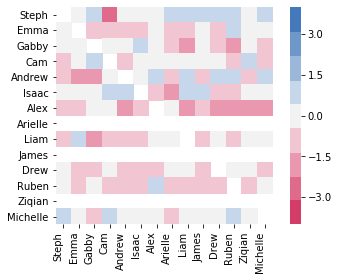

In [32]:
ax = sns.heatmap(
    data_diff_like, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How often do you communicate with other people (via text, Snapchat, Facebook, in person, etc.)?

##### 2017

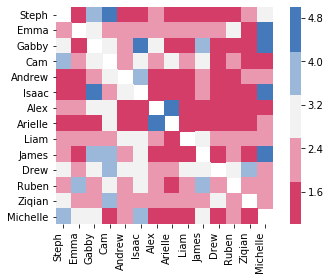

In [33]:
ax = sns.heatmap(
    data_2017_contact, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

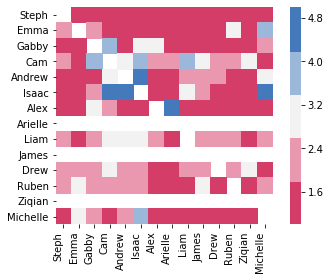

In [34]:
ax = sns.heatmap(
    data_2019_contact, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

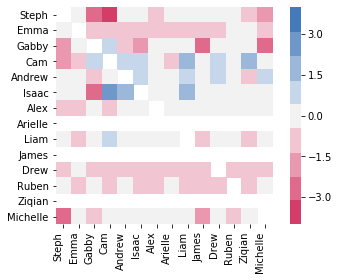

In [35]:
ax = sns.heatmap(
    data_diff_contact, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How much do you trust other people?

##### 2017

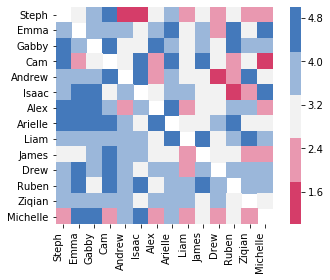

In [36]:
ax = sns.heatmap(
    data_2017_trust, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

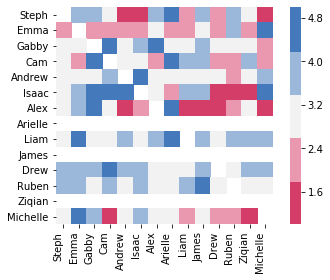

In [37]:
ax = sns.heatmap(
    data_2019_trust, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


##### Difference

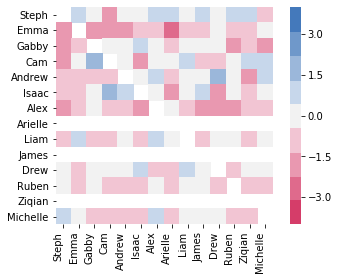

In [38]:
ax = sns.heatmap(
    data_diff_trust, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How likely are you to go to other people for advice or emotional support?

##### 2017

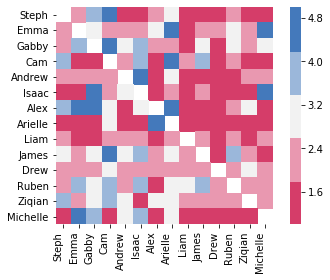

In [39]:
ax = sns.heatmap(
    data_2017_support, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

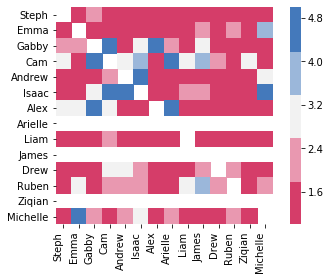

In [40]:
ax = sns.heatmap(
    data_2019_support, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

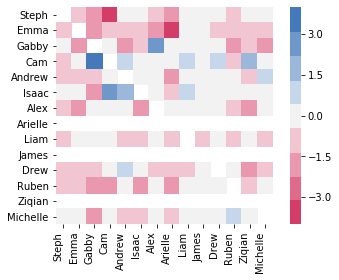

In [41]:
ax = sns.heatmap(
    data_diff_support, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);